In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("waterquality.csv")
df.shape

(2371, 8)

In [5]:
df.describe

<bound method NDFrame.describe of             Date  Salinity (ppt)  DissolvedOxygen (mg/L)   pH  \
0     1989-05-11             NaN                     NaN  7.5   
1     1989-05-18             NaN                    12.0  7.5   
2     1989-05-25             NaN                     NaN  8.0   
3     1989-06-01             NaN                    12.0  8.0   
4     1989-07-11             NaN                     NaN  8.5   
...          ...             ...                     ...  ...   
2366         NaN             0.0                     NaN  7.0   
2367         NaN             NaN                     NaN  NaN   
2368         NaN             0.0                     3.9  6.5   
2369         NaN             1.0                     NaN  7.0   
2370         NaN             0.0                     NaN  NaN   

      SecchiDepth (m)  WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
0                 0.3             0.9           17.0   -17.777778  
1                 0.2             0.6           1

In [6]:
df.columns.tolist()

['Date',
 'Salinity (ppt)',
 'DissolvedOxygen (mg/L)',
 'pH',
 'SecchiDepth (m)',
 'WaterDepth (m)',
 'WaterTemp (C)',
 'AirTemp (C)']

In [7]:
df.isnull().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

In [8]:
df.duplicated().sum()

10

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2366 non-null   object 
 1   Salinity (ppt)          2241 non-null   float64
 2   DissolvedOxygen (mg/L)  1520 non-null   float64
 3   pH                      2276 non-null   float64
 4   SecchiDepth (m)         2298 non-null   float64
 5   WaterDepth (m)          2300 non-null   float64
 6   WaterTemp (C)           2250 non-null   float64
 7   AirTemp (C)             2371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 148.3+ KB


In [10]:
#Untuk Cari garbage value yang dimana nantinya akan diproseskan untuk memanage memory dan secara otomatis  
# menghapus object/data yang tidak digunakan untuk free memory
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())

Date
2017-04-04    6
2001-11-06    5
2006-09-21    5
2006-03-15    5
2006-04-06    5
             ..
1995-05-22    1
1995-05-29    1
1995-06-05    1
1995-06-12    1
2019-11-05    1
Name: count, Length: 801, dtype: int64


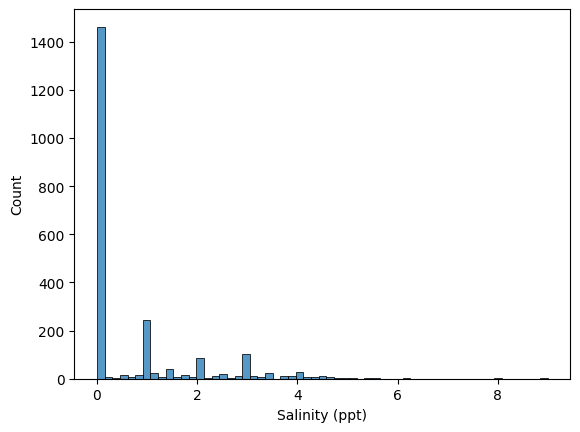

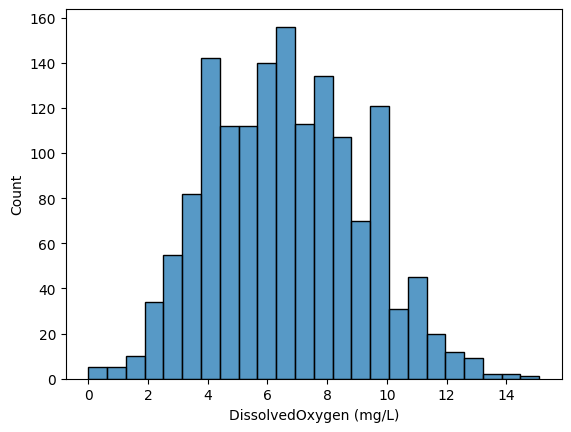

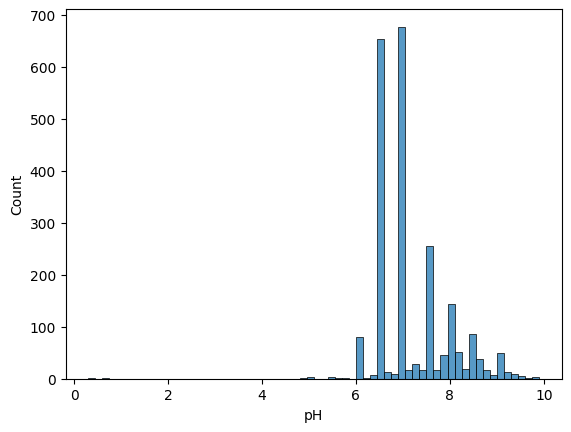

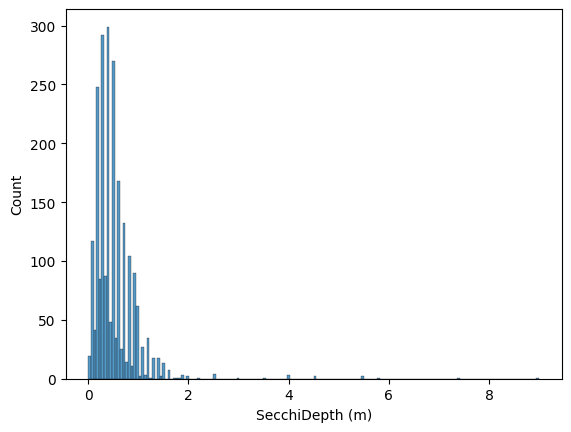

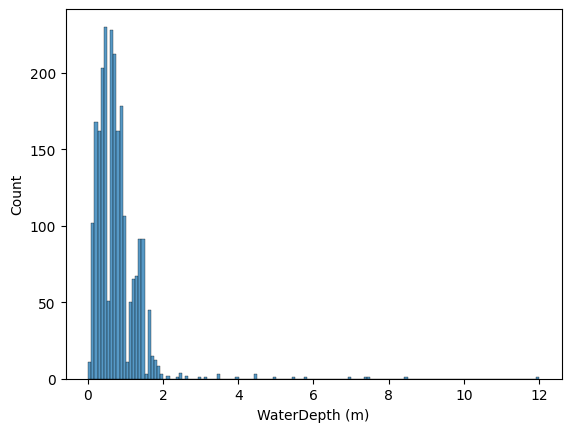

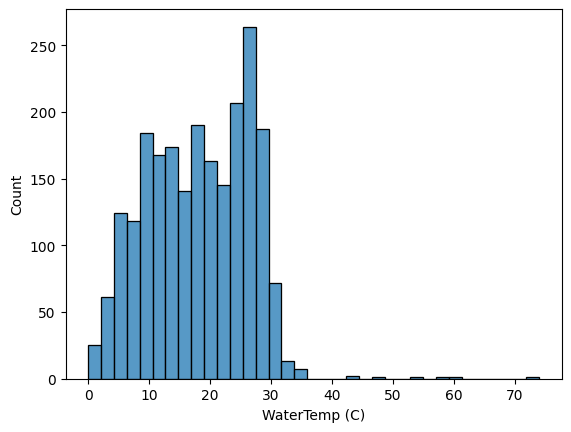

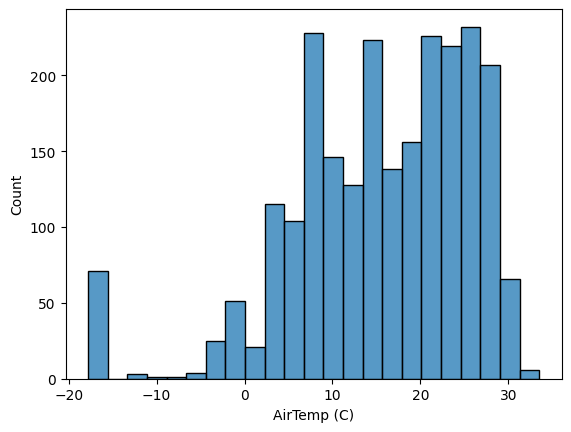

In [11]:
#Melihat distriubusi datanya pakai histogra

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

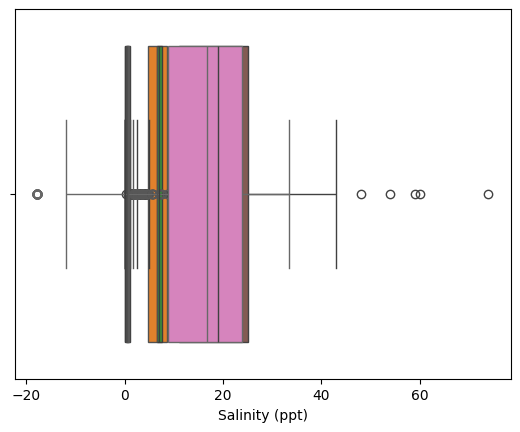

In [12]:
#Menggunakan box-plot untuk melihat outlier yang ada karena outlier itu seperti anomai

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x= i)
    plt.show

In [13]:
for i in ["Salinity (ppt)","DissolvedOxygen (mg/L)", "pH", "SecchiDepth (m)", "WaterDepth (m)", "WaterTemp (C)"]:
    df[i].fillna(df[i].median(),inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_20036\3054206975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_20036\3054206975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [14]:
df.isnull().sum()

Date                      5
Salinity (ppt)            0
DissolvedOxygen (mg/L)    0
pH                        0
SecchiDepth (m)           0
WaterDepth (m)            0
WaterTemp (C)             0
AirTemp (C)               0
dtype: int64

In [17]:
updated_df = df.dropna(axis = 0)

In [18]:
atribut = updated_df.iloc[:,1:]
atribut

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,0.0,6.5,7.5,0.3,0.9,17.0,-17.777778
1,0.0,12.0,7.5,0.2,0.6,17.5,20.500000
2,0.0,6.5,8.0,0.4,0.8,23.0,25.000000
3,0.0,12.0,8.0,0.4,0.9,25.5,29.000000
4,0.0,6.5,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...
2361,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2362,0.0,6.5,6.5,0.9,1.0,20.0,17.222222
2363,0.0,4.6,6.5,0.2,0.2,20.0,17.222222
2364,0.1,6.5,6.5,0.7,1.0,13.0,9.444444


K-Means Clustering

In [21]:
# Hapus kolom Date karena tidak numerik
updated_df = updated_df.drop(columns=["Date"])

# 1. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(updated_df)

In [22]:
# Mencari jumlah cluster optimal (Elbow & Silhouette Score)
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


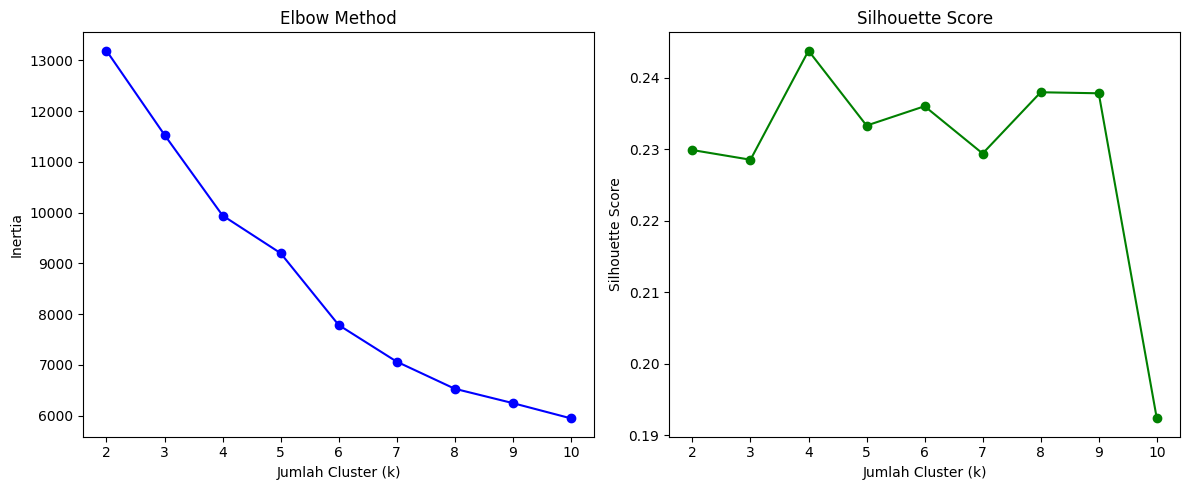

In [23]:
# Visualisasi Elbow dan Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [24]:
# Clustering final dengan k terbaik (misal k=3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)

In [25]:

# Reduksi Dimensi untuk Visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

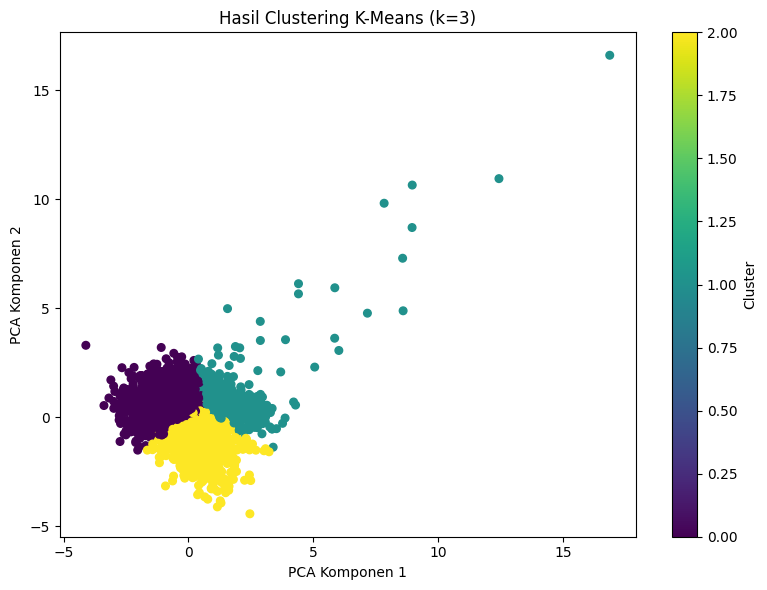

In [26]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("Hasil Clustering K-Means (k=3)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()